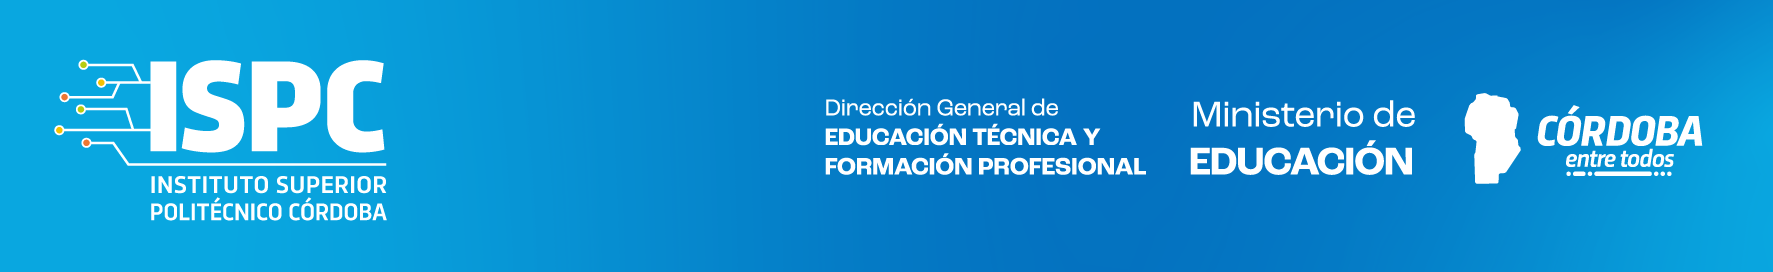

<br>
<br>

# Evidencia N° 6



<br>

# **Presentación de Analista de Datos: 27/10**



### Docentes:
- Marcos Ugarte
- Nahuel Pratta






### Alumnos Integrantes:
- Erick López
- Christian Nüesch
- Débora Zurita


<br>
<br>

pie_de_página.png

<br>
<br>

# Carga y preparación del dataset


<br>

En esta etapa, procederemos a cargar el conjunto de datos que ha sido procesado y curado en fases anteriores para asegurar su calidad y relevancia. Utilizaremos la librería Pandas para facilitar la manipulación de los datos. Dependiendo de tu entorno de trabajo, hay dos opciones para cargar el dataset:

 - Se puede subir el archivo CSV manualmente a la sección de archivos de Google Colab y luego cargarlo.
 - Se puede leer el archivo directamente desde un recurso online, como GitHub, utilizando la URL del archivo.


In [45]:
# Importamos la función 'data_table' de Google Colab para mejorar la visualización de DataFrames
# Habilitamos el formateador de DataFrames para permitir una presentación más interactiva en el entorno de Colab.

from google.colab import data_table
data_table.enable_dataframe_formatter()


<br>


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos Pandas para mostrar los números flotantes con dos decimales,
# evitando así la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cargamos el Dataset en un DataFrame llamado 'data'

# Para cargar el Dataset desde Google Colab de manera manual en la seccion de archivos, usa la siguiente línea
# data = pd.read_csv('autos_argentina_curado.csv')

# Para leer el archivo directamente desde GitHub, utiliza la siguiente línea
data = pd.read_csv('https://raw.githubusercontent.com/ISPC-TSCDIA/Data24_PPI/refs/heads/main/datos/autos_argentina_curado.csv')

# Verificamos el Dataset
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,10850000,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,5800000,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,5250000,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,3960000,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900,dólares,0.74


<br>

En los datos recolectados, se encuentran registros de autos en pesos y en dólares. Para unificar la moneda, realizamos una transformación en el dataframe para convertir todos los valores a dólares.

<br>

Optamos por esta alternativa considerando la posibilidad de añadir más registros en el futuro, lo que garantiza que todos los datos estén en una moneda constante y unificada.

<br>

Sin esta unificación, los análisis quedarían sesgados. La primera visualización del dataset muestra una gran diferencia nominal debido a la brecha cambiaria.

<br>

**Elección del tipo de cambio**

En Argentina, el tipo de cambio paralelo, conocido como "dólar blue", ofrece una mejor representación de la realidad económica para dolarizar precios en un dataset, especialmente para bienes de alto valor como vehículos. Esto se debe a que refleja de manera más precisa el acceso real a dólares, el poder adquisitivo y un ajuste más fiel a la realidad económica. Por lo tanto, utilizar el tipo de cambio paralelo puede mejorar la capacidad predictiva de los modelos. En conclusión, el tipo de cambio paralelo ofrece una mejor representación de la realidad económica de las transacciones de vehículos en Argentina.

<br>

**Tipo de cambio con el que se trabajará:** 1USD = 380ARS

Fuente de la cotización: https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2023

<br>


In [65]:
# Definimos la tasa de cambio (1 USD = 380 ARS)
tipo_cambio = 380

# Función para convertir precios de pesos a dólares
def convertir_a_dolar(row):
    if row['Moneda'] == 'pesos':
        return row['Precio'] / tipo_cambio
    return row['Precio']

# Aplicamos la función a cada fila del dataframe y redondeamos a dos decimales
data['Precio'] = data.apply(lambda x: round(convertir_a_dolar(x), 2), axis=1)

# Verificamos el dataframe transformado
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00,dólares,0.74


<br>

Dado que las columnas `Moneda` y `Año_zscore` (esta última proveniente de otro análisis) ya no serán necesarias, las eliminamos del dataframe.

Para realizar esta acción utilizamos el método `drop()` de Pandas, donde:

- El parámetro `columns=['Moneda', 'Año_zscore']` especifica las columnas que se quieren eliminar

- `drop()` devuelve una copia del dataframe sin las columnas especificadas, por lo que reasignamos el resultado a `data`.

<br>


In [66]:
# Eliminamos las columnas 'Moneda' y 'Año_zscore'
data = data.drop(columns=['Moneda', 'Año_zscore'])

# Verificamos el DataFrame sin esas columnas
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00
...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00


<br>
<br>

pie_de_página.png

<br>

<br>

# Regresión Lineal Múltiple

<br>
<br>

## Preprocesamientos de datos

Se identificaron las columnas numéricas y categóricas en el DataFrame utilizando la función select_dtypes(). Las columnas numéricas, de tipo int64 y float64, contienen datos continuos o enteros, mientras que las columnas categóricas, de tipo object, incluyen datos no numéricos, como texto o categorías.

Esta distinción es importante porque las columnas numéricas y categóricas deben tratarse de forma diferente en el análisis. Las numéricas generalmente se normalizan o estandarizan, mientras que las categóricas deben ser codificadas (por ejemplo, mediante one-hot encoding o label encoding) para que los modelos de machine learning puedan procesarlas correctamente. Este paso prepara los datos para el siguiente análisis y modelado.

In [67]:
# Identificar columnas numéricas y categóricas en el DataFrame data
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = data.select_dtypes(include=['object']).columns.tolist()

# Mostrar listas de columnas
print("Columnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)


Columnas categóricas: ['Marca', 'Modelo', 'Color', 'Combustible', 'Caja', 'Carrocería']
Columnas numéricas: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Precio']


<br>

Se extrajeron los colores únicos presentes en la columna 'Color' utilizando el método unique(), lo que permitió identificar todos los tipos de colores que aparecen en el conjunto de datos. Además, se calculó la frecuencia de aparición de cada color mediante value_counts(), lo que proporciona un conteo de cuántas veces aparece cada color en la columna.

Con esta información, se identificaron los colores más comunes mediante nlargest(6), que muestra los seis colores con mayor frecuencia en el conjunto de datos. Esto ayuda a entender qué colores son más representativos o populares en el conjunto de datos, lo que puede ser útil para realizar análisis adicionales o tomar decisiones informadas sobre la variable 'Color'.

In [68]:
# Extraer y mostrar todos los colores únicos presentes en la columna 'Color'
todos_los_colores = data['Color'].unique()
print("\nTipos de colores únicos en el conjunto de datos:", todos_los_colores)

# Contar la frecuencia de aparición de cada color en la columna 'Color'
color_counts = data['Color'].value_counts()

# Mostrar la frecuencia de cada color
print("\nFrecuencia de colores:")
print(color_counts)

# Identificar los colores más comunes y su frecuencia
colores_comunes = color_counts.nlargest(6)
print("\nTipos de colores comunes:")
print(colores_comunes)



Tipos de colores únicos en el conjunto de datos: ['Blanco' 'Gris oscuro' 'Gris' 'Negro' 'Plateado' 'Naranja' 'Beige' 'Rojo'
 'Azul' 'Dorado' 'Marrón' 'Verde' 'Violeta' 'Celeste']

Frecuencia de colores:
Color
Gris           167
Blanco         149
Negro           57
Plateado        51
Azul            25
Rojo            23
Dorado           8
Marrón           4
Violeta          4
Celeste          4
Naranja          3
Gris oscuro      2
Verde            2
Beige            1
Name: count, dtype: int64

Tipos de colores comunes:
Color
Gris        167
Blanco      149
Negro        57
Plateado     51
Azul         25
Rojo         23
Name: count, dtype: int64


<br>

Se extrajeron los tipos de carrocería únicos presentes en la columna 'Carrocería' utilizando el método unique(), lo que permitió identificar todos los diferentes tipos de carrocería en el conjunto de datos. Luego, se calculó la frecuencia de cada tipo de carrocería usando value_counts(), lo que muestra cuántas veces aparece cada tipo.

Los tipos de carrocería más comunes fueron identificados con nlargest(4), destacando los cuatro tipos de carrocería con mayor frecuencia en el conjunto de datos. Esta información es útil para comprender la distribución de los diferentes tipos de carrocería y puede ser relevante para análisis adicionales o para segmentar los datos según las preferencias de tipo de carrocería en los vehículos.

In [69]:
# Extraer y mostrar todos los tipos de carrocería únicos presentes en la columna 'Carrocería'
todas_las_carrocerias = data['Carrocería'].unique()
print("\nTipos de carrocería únicos en el conjunto de datos:", todas_las_carrocerias)

# Contar la frecuencia de aparición de cada tipo de carrocería en la columna 'Carrocería'
carroceria_counts = data['Carrocería'].value_counts()

# Mostrar la frecuencia de cada tipo de carrocería
print("\nFrecuencia de tipos de carrocería:")
print(carroceria_counts)

# Identificar los tipos de carrocería más comunes y su frecuencia
carrocerias_comunes = carroceria_counts.nlargest(4)
print("\nTipos de carrocería comunes:")
print(carrocerias_comunes)



Tipos de carrocería únicos en el conjunto de datos: ['SUV' 'Sedán' 'Coupé' 'Hatchback' 'Pick-Up' 'Crossover' 'Monovolumen'
 'Rural' 'Furgón' 'Minivan']

Frecuencia de tipos de carrocería:
Carrocería
Hatchback      182
SUV            127
Sedán           96
Pick-Up         54
Monovolumen     18
Coupé           10
Furgón           8
Rural            3
Crossover        1
Minivan          1
Name: count, dtype: int64

Tipos de carrocería comunes:
Carrocería
Hatchback    182
SUV          127
Sedán         96
Pick-Up       54
Name: count, dtype: int64


<br>

Se creó una copia del DataFrame original para realizar los análisis sin modificar los datos originales. En este caso, se agrupó la variable 'Precio' en tres categorías (baja, media y alta) usando los terciles de la distribución de precios. Para ello, se calcularon los tercil bajo y tercil medio y se aplicó una función clasificar_gama para asignar una clasificación de 'Gama' a cada vehículo en función de su precio.

La distribución de la gama se calculó como la proporción de vehículos en cada una de las categorías, proporcionando una visión general de cómo se distribuyen los vehículos según su precio. Además, se mostraron ejemplos de vehículos de cada gama (baja, media y alta) para ilustrar cómo los precios se distribuyen en cada categoría.

Luego, se verificaron los precios en los límites de los terciles para asegurar que los umbrales de las gamas fueran correctos, comprobando los vehículos cuyo precio se encuentra exactamente en el tercil bajo o medio.

Además, se procedió a normalizar los valores de las columnas categóricas 'Color' y 'Carrocería' reemplazando los colores y tipos de carrocería menos comunes por la categoría 'Otros', lo que facilita el análisis de las variables sin perder demasiada información.

Por último, se aplicó One-Hot Encoding a las variables categóricas, excluyendo las columnas 'Marca' y 'Modelo', para convertir las variables categóricas en variables numéricas, lo que permite que el modelo de análisis las procese de forma más eficiente. Esto generó un conjunto de datos codificado para ser utilizado en análisis posteriores.

In [70]:
# Crear una copia del DataFrame original para realizar análisis sin modificar los datos originales
data_agrupacion = data.copy()

# Clasificación de la gama de precios en tres grupos (terciles)
tercil_bajo = data_agrupacion['Precio'].quantile(0.33)
tercil_medio = data_agrupacion['Precio'].quantile(0.66)

def clasificar_gama(precio):
    if precio <= tercil_bajo:
        return 'Baja'
    elif precio <= tercil_medio:
        return 'Media'
    else:
        return 'Alta'

# Asignar la clasificación de gama a cada fila en una nueva columna 'Gama'
data_agrupacion['Gama'] = data_agrupacion['Precio'].apply(clasificar_gama)

# Calcular la distribución de la variable 'Gama' como proporción de cada categoría
distribucion_gama = data_agrupacion['Gama'].value_counts(normalize=True).rename("proporción")
print("\nDistribución de gama (proporción):")
print(distribucion_gama)

# Muestra de los primeros 10 registros de la clasificación 'Precio' y 'Gama'
print("\nPrimeros 10 ejemplos de clasificación 'Precio' y 'Gama':")
print(data_agrupacion[['Precio', 'Gama']].head(10))

# Ejemplos en cada gama
print("\nEjemplos en la gama Baja:")
print(data_agrupacion[data_agrupacion['Gama'] == 'Baja'][['Precio', 'Gama']].head(10))

print("\nEjemplos en la gama Media:")
print(data_agrupacion[data_agrupacion['Gama'] == 'Media'][['Precio', 'Gama']].head(10))

print("\nEjemplos en la gama Alta:")
print(data_agrupacion[data_agrupacion['Gama'] == 'Alta'][['Precio', 'Gama']].head(10))

# Verificación de precios en el límite de los terciles
print("\nVerificación: Precios en el límite del tercil bajo")
print(data_agrupacion[data_agrupacion['Precio'] == tercil_bajo][['Precio', 'Gama']])

print("\nVerificación: Precios en el límite del tercil medio")
print(data_agrupacion[data_agrupacion['Precio'] == tercil_medio][['Precio', 'Gama']])

# Reemplazamos colores no comunes por 'Otros' en la columna 'Color'
data_agrupacion['Color'] = data_agrupacion['Color'].apply(lambda color: color if color in colores_comunes else 'Otros')

# Reemplazamos carrocerías no comunes por 'Otros' en la columna 'Carrocería'
data_agrupacion['Carrocería'] = data_agrupacion['Carrocería'].apply(lambda carroceria: carroceria if carroceria in carrocerias_comunes else 'Otros')

# Aplicar One-Hot Encoding para las columnas categóricas excluyendo 'Marca' y 'Modelo'
data_encoded = pd.get_dummies(data_agrupacion.drop(['Marca', 'Modelo'], axis=1),
                              columns=['Color', 'Combustible', 'Caja', 'Carrocería'],
                              drop_first=True)



Distribución de gama (proporción):
Gama
Alta    0.34
Baja    0.33
Media   0.33
Name: proporción, dtype: float64

Primeros 10 ejemplos de clasificación 'Precio' y 'Gama':
    Precio   Gama
0 28552.63   Alta
1 35500.00   Alta
2 15263.16  Media
3 34500.00   Alta
4 25000.00   Alta
5 12300.00  Media
6 35500.00   Alta
7 17894.74   Alta
8 38500.00   Alta
9 20500.00   Alta

Ejemplos en la gama Baja:
    Precio  Gama
11 5526.32  Baja
12 7736.84  Baja
13 5394.74  Baja
20 6315.79  Baja
23 6447.37  Baja
25 6447.37  Baja
26 6802.63  Baja
29 5131.58  Baja
30 8026.32  Baja
31 8289.47  Baja

Ejemplos en la gama Media:
     Precio   Gama
2  15263.16  Media
5  12300.00  Media
14 10842.11  Media
15 10789.47  Media
16 15000.00  Media
17 13418.42  Media
19 11842.11  Media
21 13684.21  Media
24 13684.21  Media
27 11315.79  Media

Ejemplos en la gama Alta:
     Precio  Gama
0  28552.63  Alta
1  35500.00  Alta
3  34500.00  Alta
4  25000.00  Alta
6  35500.00  Alta
7  17894.74  Alta
8  38500.00  Alta
9  20500.

<br>

Se aplicó el One-Hot Encoding a la columna 'Gama', creando nuevas columnas binarias para representar cada categoría de esta variable. Como el parámetro drop_first=True fue utilizado, la categoría de 'Baja' fue eliminada, evitando así la multicolinealidad y dejando solo las categorías 'Media' y 'Alta' como variables dummy.

Luego, se convirtió cualquier columna booleano del DataFrame en valores enteros (0 y 1) para asegurar que todos los datos sean numéricos y puedan ser procesados adecuadamente en modelos de machine learning. Esto es esencial, ya que muchos algoritmos requieren que las variables sean numéricas.

Para facilitar la visualización del DataFrame resultante, que puede contener muchas columnas después de la transformación, se dividió el DataFrame en dos partes. Esto permite revisar de manera más clara las variables generadas por el One-Hot Encoding. Se mostró la primera mitad y la segunda mitad del DataFrame para que se pudiera verificar visualmente cómo quedaron representadas las variables tras el preprocesamiento.

In [71]:
# Aplicar one-hot encoding a la columna 'Gama'
data_encoded = pd.get_dummies(data_encoded, columns=['Gama'], drop_first=True)

# Convertir booleanos a enteros (0 y 1)
data_encoded[data_encoded.select_dtypes(include=['bool']).columns] = data_encoded.select_dtypes(include=['bool']).astype(int)

# Verificar el dataframe resultante con One-Hot Encoding
print("\nDataframe con One-Hot Encoding aplicado:")

# Dividir el DataFrame en dos partes para facilitar la visualización si hay muchas columnas
mitad = len(data_encoded.columns) // 2
data_primera_mitad = data_encoded.iloc[:, :mitad]
data_segunda_mitad = data_encoded.iloc[:, mitad:]

# Mostrar la primera mitad del DataFrame para revisión
display(data_primera_mitad)

# Mostrar la segunda mitad del DataFrame para revisión
display(data_segunda_mitad)



Dataframe con One-Hot Encoding aplicado:


,Año,Puertas,Motor,Kilómetros,Precio,Color_Blanco,Color_Gris,Color_Negro,Color_Otros,Color_Plateado
0,2022,5,2.40,500,28552.63,1,0,0,0,0
1,2022,5,2.40,500,35500.00,0,0,0,1,0
2,2019,4,1.80,9000,15263.16,0,1,0,0,0
3,2022,5,1.30,10500,34500.00,0,0,1,0,0
4,2014,5,2.20,156000,25000.00,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
495,2018,5,1.80,52000,13815.79,0,1,0,0,0
496,2019,4,3.00,49000,46000.00,0,1,0,0,0
497,2017,5,1.60,75358,10421.05,1,0,0,0,0
498,2019,4,3.00,57500,44900.00,0,1,0,0,0


,Color_Rojo,Combustible_Híbrido/Nafta,Combustible_Nafta,Combustible_Nafta/GNC,Caja_Manual,Carrocería_Otros,Carrocería_Pick-Up,Carrocería_SUV,Carrocería_Sedán,Gama_Baja,Gama_Media
0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,1,0,0,0,1,0,1
3,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,1,0,0,0,0,1,0,0,1
496,0,0,0,0,0,0,1,0,0,0,0
497,0,0,1,0,1,0,0,1,0,0,1
498,0,0,0,0,0,0,1,0,0,0,0


<br>

Después de aplicar One-Hot Encoding a las columnas categóricas y realizar algunos ajustes adicionales en el conjunto de datos, se identificaron claramente las variables numéricas y categóricas. Las variables numéricas incluyen aquellas de tipo int64 y float64, que representan valores continuos o discretos, como los precios o kilometraje de los vehículos. Por otro lado, las variables categóricas son aquellas de tipo object y bool, que contienen categorías o valores binarios, como el color del vehículo o su tipo de caja.

Al revisar el DataFrame resultante, se obtuvo un resumen detallado usando info(), que proporciona una visión general del número de entradas, el tipo de datos de cada columna y la cantidad de valores no nulos. Esta información es crucial para detectar posibles problemas como valores faltantes o inconsistencias en el tipo de datos. Además, al examinar los tipos de datos de cada columna con dtypes, se pudo confirmar que las transformaciones se aplicaron correctamente, asegurando que las variables numéricas y categóricas están listas para su análisis o modelado.

In [72]:
# Variables numéricas
variables_numericas = data_encoded.select_dtypes(include=['int64', 'float64'])
print("Variables numéricas:")
print(variables_numericas.columns)

# Variables categóricas
variables_categoricas = data_encoded.select_dtypes(include=['object', 'bool'])
print("\nVariables categóricas:")
print(variables_categoricas.columns)

# Mostrar información sobre el DataFrame, incluyendo tipos de datos y cantidad de entradas
print("\nInformación del DataFrame:")
print(data_encoded.info())

# Tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(data_encoded.dtypes)


Variables numéricas:
Index(['Año', 'Puertas', 'Motor', 'Kilómetros', 'Precio', 'Color_Blanco',
       'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado',
       'Color_Rojo', 'Combustible_Híbrido/Nafta', 'Combustible_Nafta',
       'Combustible_Nafta/GNC', 'Caja_Manual', 'Carrocería_Otros',
       'Carrocería_Pick-Up', 'Carrocería_SUV', 'Carrocería_Sedán', 'Gama_Baja',
       'Gama_Media'],
      dtype='object')

Variables categóricas:
Index([], dtype='object')

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        500 non-null    int64  
 1   Puertas                    500 non-null    int64  
 2   Motor                      500 non-null    float64
 3   Kilómetros                 500 non-null    int64  
 4   Precio                     500 non-null    float64

<br>
<br>

**División del dataset en conjunto de entrenamiento y prueba**



Se ha realizado la división del conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. Para ello, se ha utilizado la función train_test_split de sklearn.model_selection, la cual divide las variables independientes (X) y dependientes (y), asegurando que el modelo entrenado en los datos de entrenamiento pueda ser evaluado de manera objetiva en un conjunto de datos independiente, el conjunto de prueba.

En este caso, el 80% de los datos se destinan a entrenamiento, y el 20% restante se utiliza para la prueba. El conjunto de entrenamiento (X_train y y_train) se emplea para ajustar el modelo, mientras que el conjunto de prueba (X_test y y_test) se utiliza para evaluar el rendimiento del modelo una vez entrenado.

In [55]:
from sklearn.model_selection import train_test_split

# Definimos las variables independientes (todo excepto 'Precio') y dependiente ('Precio')
X = data_encoded.drop(['Precio'], axis=1)  # Variables independientes
y = data_encoded['Precio']                  # Variable dependiente

# # Dividimos los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora tenemos:
# - X_train, y_train: datos de entrenamiento
# - X_test, y_test: datos de prueba


<br>


- `X_train` Características para entrenar el modelo.
- `y_train` Valores de la variable objetivo para entrenar el modelo.|
- `X_test` Características para evaluar el modelo.|
- `y_test` Valores reales (objetivo) correspondientes a `X_test` para evaluar el rendimiento del modelo.
- `test_size=0.2`- Usa el 20% de los datos para prueba, y el 80% para entrenamiento.
- `random_state=42` Garantiza que la división sea la misma cada vez que ejecutes el código.

<br>

Verificamos la forma de los conjuntos divididos:


In [56]:
# Mostrar las dimensiones de los datos de entrada y de la variable objetivo
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (400, 20)
Forma de y_train: (400,)
Forma de X_test: (100, 20)
Forma de y_test: (100,)


<br>

**Correlación lineal entre variables numéricas**

Se calculó la matriz de correlación para las variables numéricas usando el método de Pearson, lo que permitió observar cómo se relacionan entre sí. Para facilitar la visualización, se eliminó la mitad superior de la matriz, ya que es redundante debido a la simetría de las correlaciones. La matriz fue luego reorganizada en un formato "tidy", donde cada fila muestra un par de variables y su respectiva correlación.

El valor absoluto de cada correlación fue calculado y la tabla se ordenó para destacar las relaciones más fuertes, enfocándose en las correlaciones más relevantes entre las variables, sin necesidad de considerar los valores negativos.

In [73]:
# Calculamos la matriz de correlación para las variables numéricas usando el método de Pearson
corr_matrix = data_encoded.corr(method='pearson')

# Solo mantenemos la mitad inferior de la matriz para simplificar la visualización
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan

# Convertimos la matriz de correlación a formato "tidy" (ordenado)
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()

# Calcular el valor absoluto de la correlación para ordenar
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostramos la tabla ordenada de correlaciones entre variables numéricas
corr_matrix_tidy


,variable_1,variable_2,r,r_abs
0,Año,Kilómetros,-0.68,0.68
1,Combustible_Nafta,Carrocería_Pick-Up,-0.58,0.58
2,Motor,Precio,0.56,0.56
3,Gama_Baja,Gama_Media,-0.49,0.49
4,Color_Blanco,Color_Gris,-0.46,0.46
...,...,...,...,...
205,Color_Gris,Gama_Baja,-0.00,0.00
206,Motor,Color_Blanco,0.00,0.00
207,Puertas,Caja_Manual,-0.00,0.00
208,Color_Negro,Carrocería_Sedán,0.00,0.00


<br>

Se filtraron las correlaciones que involucran la variable "Precio" para identificar cuáles otras variables están más relacionadas con ella. Luego, se calculó el valor absoluto de cada correlación para resaltar la fuerza de la relación, independientemente de si es positiva o negativa. Las correlaciones se ordenaron según su valor absoluto de mayor a menor, lo que permite identificar rápidamente las variables que tienen una mayor influencia sobre el "Precio".

In [74]:
# Filtrar las correlaciones con respecto a "Precio" y hacer una copia
corr_with_price = corr_matrix_tidy[(corr_matrix_tidy['variable_1'] == 'Precio') | (corr_matrix_tidy['variable_2'] == 'Precio')].copy()

# Calcular el valor absoluto de la correlación para facilitar la visualización
corr_with_price['r_abs'] = corr_with_price['r'].abs()

# Ordenar por el valor absoluto de la correlación
corr_with_price = corr_with_price.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostrar el resultado
print("Correlaciones con respecto a 'Precio':")
print(corr_with_price)


Correlaciones con respecto a 'Precio':
    variable_1                 variable_2     r  r_abs
0        Motor                     Precio  0.56   0.56
1       Precio                Caja_Manual -0.33   0.33
2      Puertas                     Precio -0.29   0.29
3       Precio                  Gama_Baja -0.29   0.29
4   Kilómetros                     Precio -0.27   0.27
5          Año                     Precio  0.24   0.24
6       Precio           Carrocería_Otros  0.23   0.23
7       Precio         Carrocería_Pick-Up  0.17   0.17
8       Precio                 Gama_Media -0.17   0.17
9       Precio           Carrocería_Sedán -0.08   0.08
10      Precio             Color_Plateado -0.07   0.07
11      Precio      Combustible_Nafta/GNC -0.07   0.07
12      Precio          Combustible_Nafta -0.07   0.07
13      Precio  Combustible_Híbrido/Nafta  0.04   0.04
14      Precio                 Color_Rojo -0.03   0.03
15      Precio             Carrocería_SUV  0.03   0.03
16      Precio            

<br>

**Matriz de correlaciones**

Se generó un heatmap de la matriz de correlaciones entre las variables numéricas del conjunto de datos. Este gráfico visualiza las relaciones lineales entre las variables, donde los colores más intensos indican una correlación más fuerte, ya sea positiva o negativa. La escala de colores va de -1 a 1, representando una correlación perfecta negativa y positiva, respectivamente. Los valores anotados dentro de las celdas indican el coeficiente de correlación entre las variables, facilitando la interpretación visual de las relaciones.

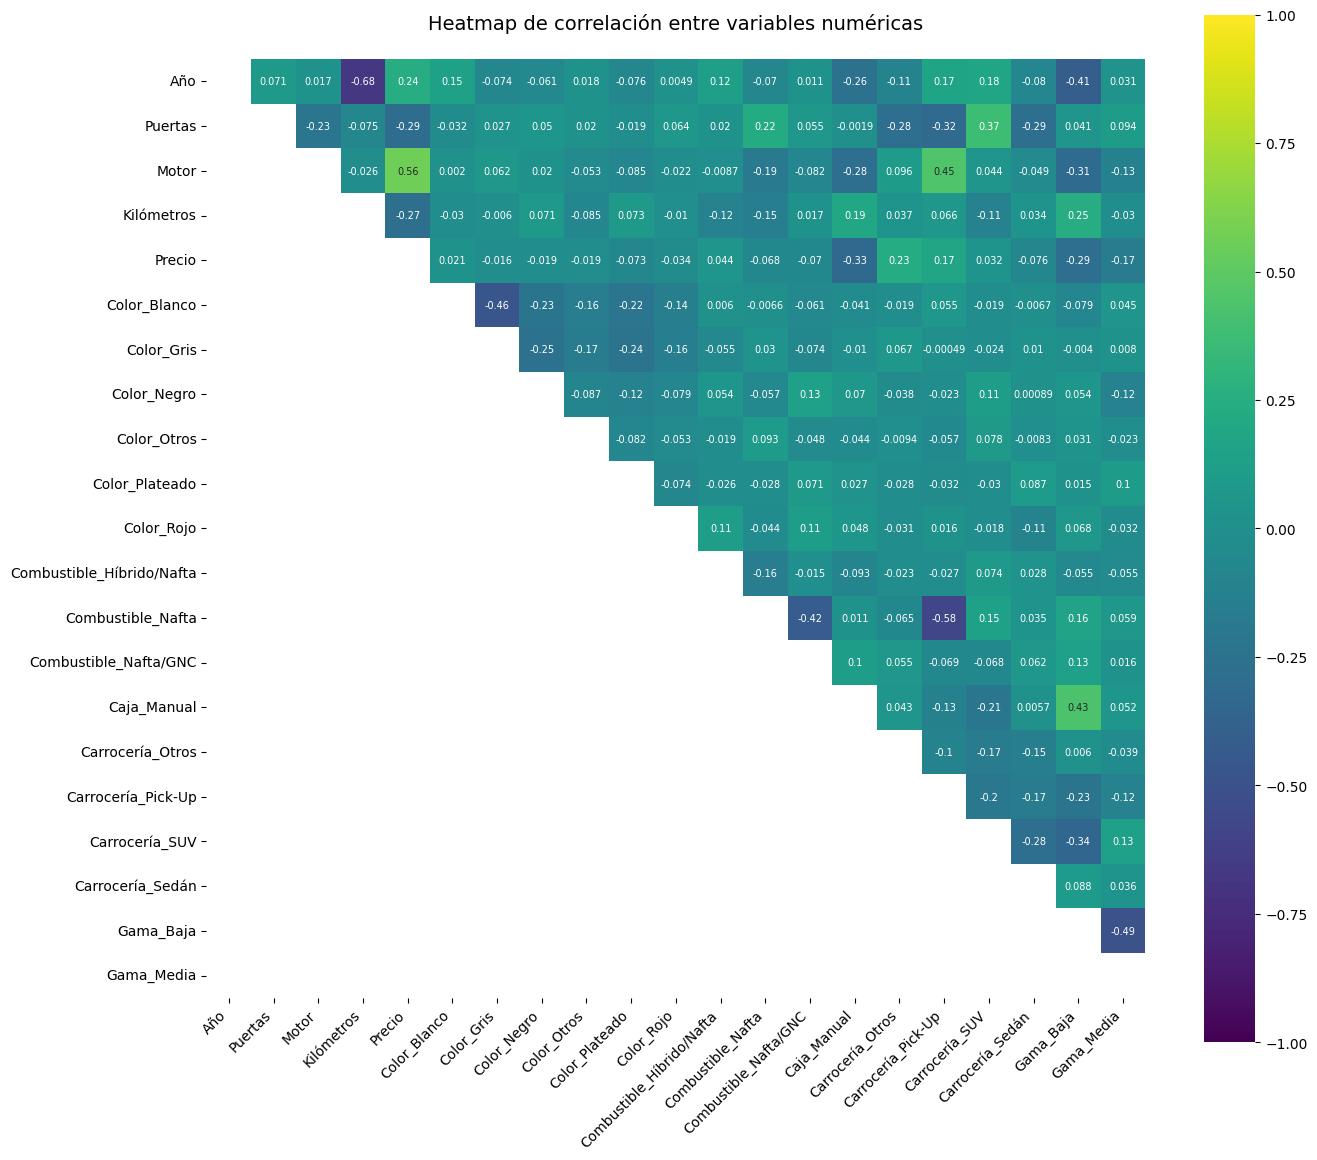

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap de la matriz de correlaciones
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 7},
    vmin=-1,
    vmax=1,
    center=0,
    cmap="viridis",
    square=True,
)

# Ajustes de etiquetas
plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)

# Título del gráfico
plt.title('Heatmap de correlación entre variables numéricas\n', fontsize=14)
plt.tight_layout()
plt.show()


<br>

**Gráfico de distribución para cada variable numérica**

Se generó un conjunto de gráficos de distribución (histograma y KDE) para cada variable numérica del conjunto de datos. Estos gráficos permiten observar la distribución de las variables, lo que ayuda a identificar la forma de los datos, como la simetría, sesgo o la presencia de múltiples modas. El uso de KDE (Kernel Density Estimation) permite suavizar el histograma y obtener una estimación de la distribución subyacente. Además, se emplearon diferentes colores para cada variable para facilitar la distinción visual entre ellas.


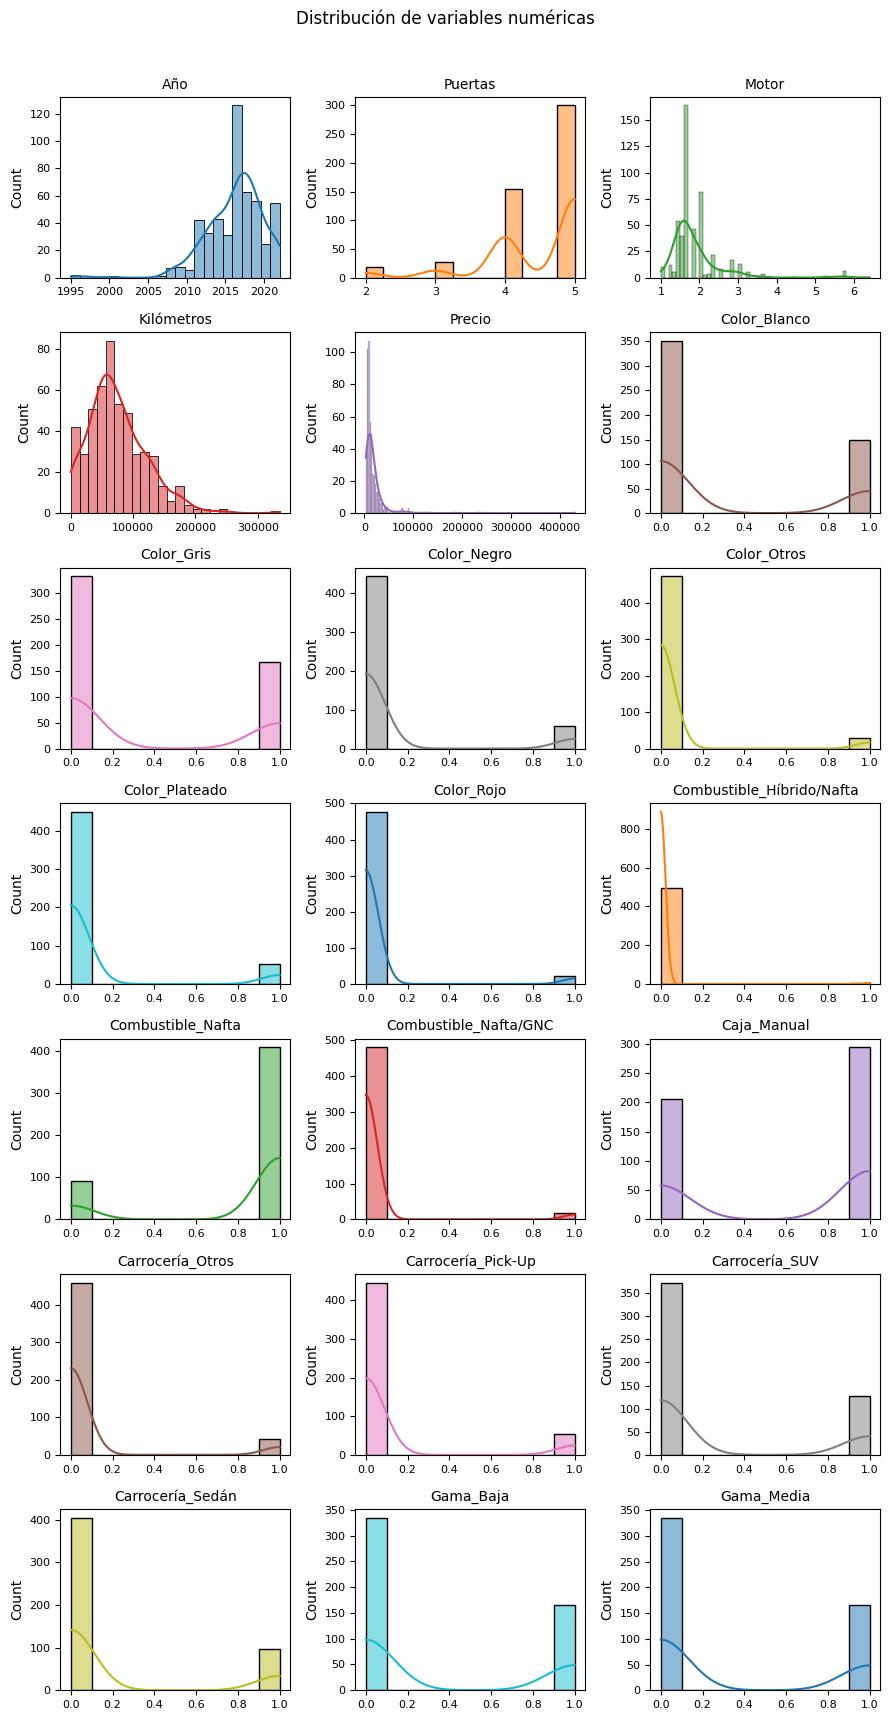

In [60]:
# Seleccionar las variables numéricas del DataFrame
columnas_numeric = data_encoded.select_dtypes(include=np.number).columns

# Ajustar el número de subplots en función del número de columnas
n_cols = 3  # Número de columnas
n_rows = int(np.ceil(len(columnas_numeric) / n_cols))  # Número de filas

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 3, n_rows * 2.5))
axes = axes.flatten()

# Generar el histograma y KDE para cada variable numérica
num_colores = len(list(plt.rcParams['axes.prop_cycle']))
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data=data_encoded,
        x=colum,
        stat="count",
        kde=True,
        color=list(plt.rcParams['axes.prop_cycle'])[i % num_colores]["color"],
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Distribución de variables numéricas', fontsize=12, y=0.98)

# Mostrar los gráficos
plt.show()


<br>

##Ajuste del modelo

<br>

**Ajuste del modelo utilizando el modo fórmula (similar a R)**

El modelo de regresión lineal se ajustó utilizando el método de fórmula, similar al enfoque en R. Primero, se escalaron los conjuntos de entrenamiento y prueba, asegurando que todas las variables independientes tuvieran una media de 0 y una desviación estándar de 1, mejorando el rendimiento del modelo y la convergencia del algoritmo.

En el conjunto de entrenamiento, se creó un DataFrame con los datos escalados y se añadió la variable dependiente Precio. Luego, se limpiaron los nombres de las columnas para que fueran válidos en la fórmula del modelo.

Se definió la fórmula de regresión lineal, excluyendo Precio como variable dependiente, y se ajustó el modelo usando la librería statsmodels con la función ols(). Esta función permite ajustar modelos lineales de forma eficiente, proporcionando coeficientes de variables, valor R² y valores p, que indican la significancia estadística de cada variable.

El análisis del modelo evalúa las variables que mejor explican las variaciones en el precio de los vehículos, identificando los predictores más relevantes. También permite detectar problemas de multicolinealidad y revisar la significancia de las variables incluidas.


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.formula.api as smf

# Verificamos las columnas de los conjuntos de entrenamiento y prueba
print("Columnas de X_train:", X_train.columns.tolist())
print("Columnas de X_test:", X_test.columns.tolist())

# Escalamos las variables para que todas tengan media 0 y desviación estándar 1,
# lo que puede mejorar el rendimiento del modelo.
scaler = StandardScaler()

# Ajustamos y transformamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformamos los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Verificamos las dimensiones de los datos escalados
print("\nForma de X_train_scaled:", X_train_scaled.shape)
print("Forma de X_test_scaled:", X_test_scaled.shape)

# Se crea un DataFrame con los datos de entrenamiento escalados
datos_train = pd.DataFrame(X_train_scaled, columns=X.columns)
datos_train['Precio'] = y_train.values  # Añadimos la variable dependiente 'Precio' al DataFrame

# Limpiamos los nombres de las columnas para que sean válidos en la fórmula
datos_train.columns = datos_train.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# Verificamos los nombres de las columnas después de limpiar para asegurarnos de que
# sean válidos y consistentes para su uso en la fórmula del modelo.
print("\nColumnas válidas:", datos_train.columns.tolist())
print(" ")

# Definimos la fórmula para la regresión lineal,
# excluyendo la variable dependiente 'Precio'.
formula = 'Precio ~ ' + ' + '.join(datos_train.columns.difference(['Precio']))

# Ajustamos el modelo de regresión lineal utilizando la fórmula definida
modelo = smf.ols(formula=formula, data=datos_train)
modelo_res = modelo.fit()

# Mostrar el modelo ajustado para evaluar su rendimiento y coeficientes
print(modelo_res.summary())


Columnas de X_train: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Color_Blanco', 'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado', 'Color_Rojo', 'Combustible_Híbrido/Nafta', 'Combustible_Nafta', 'Combustible_Nafta/GNC', 'Caja_Manual', 'Carrocería_Otros', 'Carrocería_Pick-Up', 'Carrocería_SUV', 'Carrocería_Sedán', 'Gama_Baja', 'Gama_Media']
Columnas de X_test: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Color_Blanco', 'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado', 'Color_Rojo', 'Combustible_Híbrido/Nafta', 'Combustible_Nafta', 'Combustible_Nafta/GNC', 'Caja_Manual', 'Carrocería_Otros', 'Carrocería_Pick-Up', 'Carrocería_SUV', 'Carrocería_Sedán', 'Gama_Baja', 'Gama_Media']

Forma de X_train_scaled: (400, 20)
Forma de X_test_scaled: (100, 20)

Columnas válidas: ['A_o', 'Puertas', 'Motor', 'Kil_metros', 'Color_Blanco', 'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado', 'Color_Rojo', 'Combustible_H_brido_Nafta', 'Combustible_Nafta', 'Combustible_Nafta_GNC',

<br>

**Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)**

Se ajustó el modelo de regresión lineal utilizando matrices X e y con la librería statsmodels. Primero, se añadió una columna de unos a la matriz X_train_scaled para representar el término constante (intercepto) del modelo. Esto permite que el modelo ajuste correctamente los datos, sin forzar que la línea de regresión pase por el origen.

Luego, se utilizó la función OLS de statsmodels para ajustar el modelo, donde endog es la variable dependiente (y_train) y exog es la matriz de variables independientes (con la columna de unos añadida). El modelo estima los coeficientes de la regresión, lo que indica cómo cada variable independiente influye sobre el precio.

El resultado del modelo incluye los coeficientes de cada variable, el valor de R² (que muestra qué tan bien el modelo explica la variabilidad de la variable dependiente) y los valores p, que ayudan a evaluar si las variables son estadísticamente significativas. Estos resultados son clave para interpretar la relación entre las variables y el precio.


In [77]:
import statsmodels.api as sm

# Añadimos una columna de unos a X_train_scaled para incluir el intercepto en el modelo
X_train_matrices = sm.add_constant(X_train_scaled, prepend=True)
print("\nForma de X_train_matrices con constante:", X_train_matrices.shape)
print(" ")

# Ajustamos el modelo de regresión lineal utilizando matrices X e y
modelo_matrices = sm.OLS(endog=y_train, exog=X_train_matrices)
modelo_res_matrices = modelo_matrices.fit()

# Imprimimos el resumen del modelo ajustado
print(modelo_res_matrices.summary())



Forma de X_train_matrices con constante: (400, 21)
 
                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     29.55
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           6.02e-65
Time:                        13:52:27   Log-Likelihood:                -4306.8
No. Observations:                 400   AIC:                             8656.
Df Residuals:                     379   BIC:                             8740.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<br>

##Selección de los mejores predictores

<br>

**Funciones de selección _forward_ y _backward_ para modelos lineales de statsmodels**

La selección de predictores es un proceso clave en la construcción de modelos estadísticos, ya que permite identificar las variables más relevantes para predecir la variable objetivo, mejorando la precisión y reduciendo la complejidad del modelo. En este caso, se implementaron dos enfoques de selección de variables, ambos centrados en la elección de las características más importantes para el modelo de regresión.

El enfoque de selección hacia adelante comienza con un modelo sin predictores, añadiendo una variable a la vez. En cada paso, se evalúa cuál de las variables restantes mejora más el modelo según una métrica de evaluación, como el AIC (Criterio de Información de Akaike), el BIC (Criterio Bayesiano de Información), o el R² ajustado. El proceso continúa hasta que ninguna variable adicional mejora el ajuste del modelo, lo que indica que se ha alcanzado el conjunto óptimo de predictores. Este enfoque es útil cuando se quiere empezar con un modelo simple y expandirlo gradualmente.

Por otro lado, la selección hacia atrás parte de un modelo que incluye todas las variables posibles y elimina una a una aquellas que contribuyen menos al rendimiento del modelo. En cada iteración, se evalúa la mejora del modelo al eliminar una variable, basándose en las mismas métricas de evaluación. Este enfoque es adecuado cuando se tiene un conjunto inicial de predictores y se quiere reducir gradualmente la complejidad del modelo eliminando las variables menos relevantes.

Ambos métodos se detienen cuando ya no es posible mejorar el modelo mediante la adición o eliminación de variables, garantizando que el conjunto final de predictores sea el que mejor explica la variable dependiente sin introducir variables innecesarias o redundantes. La elección entre selección hacia adelante o hacia atrás depende de la cantidad de predictores disponibles, la complejidad del modelo y los objetivos específicos del análisis.


In [20]:
# Funciones de selecciçon forward y backward para modelos lineales de statsmodels

def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    metrica: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia atrás (backward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo eliminando variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    metrica: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


<br>
<br>

**Selección de variables hacia forward**

La selección de variables hacia adelante se utiliza para identificar las variables más relevantes para el modelo. Comienza con un modelo vacío y añade variables una a una, eligiendo en cada paso la que mejora más el criterio de evaluación (en este caso, el AIC). El proceso continúa hasta que agregar más variables ya no mejora el modelo. Los predictores seleccionados con este método son los más significativos para predecir la variable objetivo. Al final, se obtiene una lista con las variables seleccionadas.

In [78]:
# Selección de variables hacia adelante
predictores_forward = forward_selection(
    X=X_train,
    y=y_train,
    criterio='aic',  # Puedes cambiar a 'bic' o 'rsquared_adj'
    add_constant=False,
    verbose=True
)

print("Predictores seleccionados con Forward Selection:", predictores_forward)


variables: ['Motor'] | aic: 8850.430
variables: ['Motor', 'Kilómetros'] | aic: 8757.556
variables: ['Motor', 'Kilómetros', 'Caja_Manual'] | aic: 8731.085
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros'] | aic: 8712.561
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros', 'Gama_Media'] | aic: 8704.217
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros', 'Gama_Media', 'Gama_Baja'] | aic: 8689.049
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros', 'Gama_Media', 'Gama_Baja', 'Año'] | aic: 8670.569
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros', 'Gama_Media', 'Gama_Baja', 'Año', 'Puertas'] | aic: 8656.532
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros', 'Gama_Media', 'Gama_Baja', 'Año', 'Puertas', 'Carrocería_Sedán'] | aic: 8650.812
variables: ['Motor', 'Kilómetros', 'Caja_Manual', 'Carrocería_Otros', 'Gama_Media', 'Gama_Baja', 'Año', 'Puertas', 'Carrocería_Sedán', 'Carrocerí

<br>

**Selección de variables hacia backward**

La selección de variables hacia atrás comienza con un conjunto completo de predictores y elimina de manera iterativa las variables que menos contribuyen al modelo. En cada iteración, se ajusta el modelo sin una de las variables y se evalúa si el desempeño del modelo mejora, utilizando el criterio seleccionado (en este caso, AIC). El proceso continúa hasta que eliminar una variable empeora el modelo. Al final, se obtiene un conjunto de predictores que son los más relevantes, ya que eliminar cualquiera de ellos haría que el modelo pierda eficiencia.

In [79]:
# Selección de variables hacia atrás
predictores_backward = backward_selection(
    X=X_train,
    y=y_train,
    criterio='aic',  # Cambia si prefieres otro criterio
    add_constant=False,
    verbose=True
)

print("Predictores seleccionados con Backward Selection:", predictores_backward)


variables: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Color_Blanco', 'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado', 'Color_Rojo', 'Combustible_Híbrido/Nafta', 'Combustible_Nafta', 'Combustible_Nafta/GNC', 'Caja_Manual', 'Carrocería_Otros', 'Carrocería_Pick-Up', 'Carrocería_SUV', 'Carrocería_Sedán', 'Gama_Baja', 'Gama_Media'] | aic: 8656.213
variables: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado', 'Color_Rojo', 'Combustible_Híbrido/Nafta', 'Combustible_Nafta', 'Combustible_Nafta/GNC', 'Caja_Manual', 'Carrocería_Otros', 'Carrocería_Pick-Up', 'Carrocería_SUV', 'Carrocería_Sedán', 'Gama_Baja', 'Gama_Media'] | aic: 8654.214
variables: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Color_Gris', 'Color_Negro', 'Color_Otros', 'Color_Plateado', 'Color_Rojo', 'Combustible_Nafta', 'Combustible_Nafta/GNC', 'Caja_Manual', 'Carrocería_Otros', 'Carrocería_Pick-Up', 'Carrocería_SUV', 'Carrocería_Sedán', 'Gama_Baja', 'Gama_Media'] | a

<br>

**Entrenamiento del modelo final con las variables seleccionadas**

El modelo final se ajusta utilizando las variables seleccionadas mediante la técnica de selección hacia adelante. Primero, se agrega una constante a las variables predictoras para incluir el intercepto en el modelo. Luego, se ajusta una regresión lineal utilizando las variables seleccionadas y la variable dependiente, que en este caso es el precio (y_train).

In [80]:
# Añade una constante para el intercepto
X_train_con_constante = sm.add_constant(X_train[predictores_forward])

# Define y ajusta el modelo
modelo_final = sm.OLS(endog=y_train, exog=X_train_con_constante)
modelo_final_res = modelo_final.fit()

# Muestra el resumen de los resultados
print(modelo_final_res.summary())


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     54.10
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.01e-71
Time:                        14:00:09   Log-Likelihood:                -4308.9
No. Observations:                 400   AIC:                             8642.
Df Residuals:                     388   BIC:                             8690.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.791e+05   4.99

<br>

El modelo muestra una advertencia por un número de condición elevado (7.7e+07), lo que sugiere la presencia de multicolinealidad severa. Esto indica que algunas de las variables están altamente correlacionadas entre sí, lo que puede generar inestabilidad en los coeficientes del modelo y dificultar la identificación precisa de los efectos individuales de cada predictor. Como resultado, los resultados podrían volverse poco confiables, incluso si el R-cuadrado ajustado o el AIC sugieren un buen ajuste. Esta situación también puede llevar a un sobreajuste, comprometiendo la capacidad del modelo para generalizar correctamente.

En cuanto a la selección de variables, aunque se utilicen métodos como forward o backward, que generalmente mejoran el AIC, agregar más predictores no siempre se traduce en una mejora real en el ajuste del modelo. Después de cierto punto, los beneficios de añadir nuevas variables son marginales, y lo que realmente ocurre es que el modelo se vuelve más complejo sin un aumento significativo en su capacidad predictiva. Este fenómeno podría explicar por qué, a pesar de que el AIC disminuye ligeramente con cada variable añadida, el modelo no muestra una mejora significativa en la capacidad de predicción.

Por otro lado, los resultados de las pruebas de Jarque-Bera y Omnibus sugieren que los residuos del modelo no siguen una distribución normal, mostrando una alta asimetría y curtosis. Esto podría estar indicando que el modelo lineal no está capturando adecuadamente ciertos patrones no lineales o valores atípicos en los datos. Esta falta de ajuste podría ser una de las razones por las cuales la selección de predictores no mejora significativamente el rendimiento general del modelo, ya que el modelo base no está completamente adaptado a la complejidad de los datos.

Finalmente, aunque el modelo presenta un AIC más bajo y baja varianza en el conjunto de entrenamiento, esto no garantiza que el modelo sea generalizable. Es fundamental evaluar su rendimiento en un conjunto de prueba para verificar si los predictores realmente mejoran la capacidad predictiva del modelo o si simplemente añaden complejidad innecesaria. El sobreajuste es un riesgo si el modelo se ajusta excesivamente a los datos de entrenamiento sin capturar patrones que puedan generalizarse a datos no vistos, lo que afectaría su rendimiento en situaciones del mundo real.

<br>

**Selección de predictores con sklearn SequentialFeatureSelector**

Se empleó la técnica de selección secuencial hacia adelante para identificar las variables más relevantes para predecir el precio. Esta metodología comienza con un modelo vacío y, en cada iteración, agrega una variable que mejora el rendimiento del modelo según el valor de R cuadrado. La selección se realizó utilizando validación cruzada con 5 pliegues para evitar sobreajuste y garantizar que el modelo sea generalizable.

Una vez seleccionadas las características más significativas, se entrenó un modelo de regresión lineal con statsmodels, añadiendo una constante (intercepto) a las variables elegidas. El modelo ajustado muestra el impacto de cada predictor sobre el precio, permitiendo identificar cuáles son los más influyentes en la predicción, y facilita una evaluación del rendimiento del modelo utilizando métricas como el R cuadrado ajustado y el AIC. Esto nos proporciona una visión clara de las relaciones entre las variables seleccionadas y el precio.

In [31]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Configurar el selector secuencial de características
sfs = SequentialFeatureSelector(
    modelo,
    n_features_to_select='auto',  # Esto selecciona el número de características automáticamente basado en el rendimiento del modelo.
    direction='forward',  # La selección de variables será hacia adelante
    scoring='r2',  # Utiliza R² como métrica de evaluación
    cv=5  # Validación cruzada con 5 pliegues
)

# Ajusta el selector de características a los datos de entrenamiento
sfs.fit(X_train, y_train)

# Obtén los nombres de las características seleccionadas
predictores_seleccionados = sfs.get_feature_names_out().tolist()
print("Predictores seleccionados:", predictores_seleccionados)
print(" ")

# Añade una constante (intercepto) a las variables seleccionadas
X_train_con_constante = sm.add_constant(X_train[predictores_seleccionados])

# Define y ajusta el modelo OLS con statsmodels
modelo_final = sm.OLS(endog=y_train, exog=X_train_con_constante)
modelo_final_res = modelo_final.fit()

# Muestra el resumen de los resultados del modelo ajustado
print(modelo_final_res.summary())


Predictores seleccionados: ['Año', 'Puertas', 'Motor', 'Kilómetros', 'Combustible_Híbrido/Nafta', 'Caja_Manual', 'Carrocería_Pick-Up', 'Carrocería_Sedán', 'Gama_Baja', 'Gama_Media']
 
                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     57.22
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           3.09e-70
Time:                        12:39:17   Log-Likelihood:                -4313.9
No. Observations:                 400   AIC:                             8650.
Df Residuals:                     389   BIC:                             8694.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          

<br>

El modelo de regresión lineal que hemos ajustado muestra que alrededor del 59.5% de la variabilidad en los precios de los autos es explicada por las variables seleccionadas, lo que sugiere un ajuste moderado. El valor de R-squared y el F-statistic indican que el modelo es significativo en su conjunto.

Entre los predictores, Año y Motor tienen un impacto positivo sobre el precio, lo que significa que autos más nuevos y con motores más potentes tienden a ser más caros. En cambio, Puertas y Kilómetros tienen coeficientes negativos, lo que indica que un mayor número de puertas y más kilómetros recorren asociados a precios más bajos. Sin embargo, variables como Combustible_Híbrido/Nafta no muestran un efecto significativo.

El modelo también revela algunos problemas. El alto número de condición sugiere que hay multicolinealidad entre algunas variables, lo que podría afectar la precisión de los coeficientes. Además, las pruebas de normalidad de los residuos indican que el modelo podría no estar capturando completamente la complejidad de los datos, lo que sugiere que un modelo más sofisticado podría ser necesario.

In [43]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecciona las variables independientes del modelo (X_train) que fueron seleccionadas por el SFS
X_train_seleccionado = X_train[predictores_seleccionados]

# Añade una constante (intercepto) a las variables seleccionadas
X_train_seleccionado_con_constante = sm.add_constant(X_train_seleccionado)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_seleccionado_con_constante.columns

# Calcula el VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(X_train_seleccionado_con_constante.values, i)  # Use the imported function directly
                   for i in range(X_train_seleccionado_con_constante.shape[1])]

# Muestra los resultados
print(vif_data)


                     Variable       VIF
0                       const 711079.64
1                         Año      2.50
2                     Puertas      1.39
3                       Motor      1.58
4                  Kilómetros      2.09
5   Combustible_Híbrido/Nafta      1.03
6                 Caja_Manual      1.41
7          Carrocería_Pick-Up      1.79
8            Carrocería_Sedán      1.24
9                   Gama_Baja      2.63
10                 Gama_Media      1.82


<br>
<br>
<br>

##Diagnóstico de los residuos


Este análisis de los residuos de un modelo de regresión comienza con el cálculo de los residuos y su media. Una media cercana a cero indica un buen ajuste del modelo. Se utiliza la prueba de normalidad D'Agostino's K-squared para verificar si los residuos siguen una distribución normal, lo cual es esencial en muchos modelos de regresión.

Además, se calcula el estadístico Durbin-Watson para detectar la presencia de autocorrelación en los residuos; un valor cercano a 2 sugiere que no hay autocorrelación significativa. También se realiza la prueba de Breusch-Pagan para evaluar la heterocedasticidad en los residuos, ya que la variabilidad en la varianza de los errores puede afectar la validez del modelo.

Este análisis garantiza que los residuos cumplan con las suposiciones necesarias, permitiendo que las inferencias basadas en el modelo sean precisas y confiables.


In [ ]:
# Residuos y predicciones en el conjunto de entrenamiento
residuos = modelo_res.resid
prediccion_train = modelo_res.predict(datos_train.drop(columns='Precio'))

Text(0.5, 0.98, 'Diagnóstico residuos')

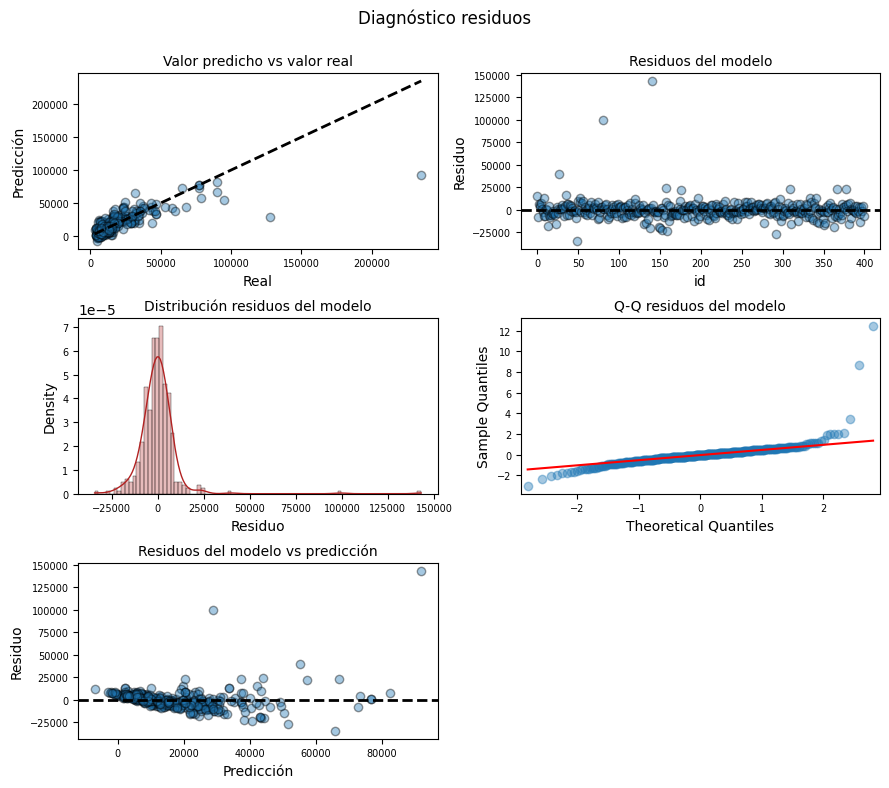

In [96]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# Gráfico de valor real vs valor predicho
axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

# Gráfico de residuos
axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

# Histograma de residuos
sns.histplot(
    data=residuos,
    stat="density",
    kde=True,
    line_kws={'linewidth': 1},
    color="firebrick",
    alpha=0.3,
    ax=axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

# Q-Q plot de residuos usando solo el parámetro 'fit' y 'line'
sm.qqplot(
    residuos,
    fit=True,
    line='q',
    ax=axes[1, 1],
    alpha=0.4,
    lw=2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

# Gráfico de residuos vs predicción
axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Eliminar el axes vacío
fig.delaxes(axes[2, 1])

# Ajustar el diseño
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12)


<br>

**Test de normalidad**

In [97]:
from scipy import stats

# Test de normalidad Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

# Test de normalidad D'Agostino's K-squared
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")



Test Shapiro-Wilk: estadístico = 0.5975830291833717, p-value = 2.0044122274781492e-29
Test D'Agostino's K-squared: estadístico = 535.9624004265427, p-value = 4.142318548859508e-117


In [102]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan

# Asumiendo que X_train_scaled son tus datos originales sin una columna de constante
X_train_with_const = sm.add_constant(X_train_scaled)  # Agrega una columna de constante

# Prueba de Breusch-Pagan para la homocedasticidad
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_train_with_const)
print(f"Estadístico F = {fvalue}, p-value = {f_p_value}")


Estadístico F = 3.351831007747257, p-value = 2.280558973814821e-06


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Crear un DataFrame con las variables independientes escaladas
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Mostrar los VIFs
print(vif_data)



                     Variable  VIF
0                         Año 2.65
1                     Puertas 1.62
2                       Motor 1.69
3                  Kilómetros 2.19
4                Color_Blanco 5.06
5                  Color_Gris 5.22
6                 Color_Negro 3.19
7                 Color_Otros 1.90
8              Color_Plateado 3.03
9                  Color_Rojo 1.86
10  Combustible_Híbrido/Nafta 1.14
11          Combustible_Nafta 2.86
12      Combustible_Nafta/GNC 1.74
13                Caja_Manual 1.45
14           Carrocería_Otros 1.37
15         Carrocería_Pick-Up 3.56
16             Carrocería_SUV 1.77
17           Carrocería_Sedán 1.59
18                  Gama_Baja 3.16
19                 Gama_Media 1.95


<br>
<br>
<br>

## Multicolinealidad (Inflación de varianza VIF)



La **multicolinealidad** se refiere a una situación en la que dos o más variables predictoras en un modelo de regresión están altamente correlacionadas entre sí.

<br>

La **Inflación de la Varianza** (VIF - Variance Inflation Factor) es una medida que cuantifica la severidad de la multicolinealidad. Un VIF alto para una variable predictora indica que su varianza está "inflada" debido a la correlación con otras variables predictoras.

<br>

Esto es un problema ya que la multicolinealidad puede hacer que las estimaciones de los coeficientes del modelo sean inestables y difíciles de interpretar. Puede llevar a:

- **Coeficientes con signos inesperados**: Por ejemplo, se obtener un coeficiente negativo para el tamaño de una casa, lo cual no tiene sentido.

- **Coeficientes con intervalos de confianza muy amplios**: Esto indica una gran incertidumbre en la estimación del efecto real de la variable.

- **Dificultad para determinar la importancia de cada variable predictora**: Es difícil saber qué variable tiene mayor impacto en la variable objetivo.


In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Crear un DataFrame de las variables independientes escaladas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Agregar una constante para el cálculo del VIF
X_train_scaled_df['intercept'] = 1

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]

# Mostrar los resultados
print(vif_data)


                     Variable  VIF
0                         Año 2.65
1                     Puertas 1.62
2                       Motor 1.69
3                  Kilómetros 2.19
4                Color_Blanco 5.06
5                  Color_Gris 5.22
6                 Color_Negro 3.19
7                 Color_Otros 1.90
8              Color_Plateado 3.03
9                  Color_Rojo 1.86
10  Combustible_Híbrido/Nafta 1.14
11          Combustible_Nafta 2.86
12      Combustible_Nafta/GNC 1.74
13                Caja_Manual 1.45
14           Carrocería_Otros 1.37
15         Carrocería_Pick-Up 3.56
16             Carrocería_SUV 1.77
17           Carrocería_Sedán 1.59
18                  Gama_Baja 3.16
19                 Gama_Media 1.95
20                  intercept 1.00


<br>
<br>


In [107]:
import numpy as np
import pandas as pd

# Definir las columnas que actuarán como predictores (variables independientes)
predictores = X_train.columns.tolist()  # Usar todas las columnas de X_train

# Calcular la matriz de correlación de Pearson entre los predictores
corr_matrix = X_train[predictores].corr(method='pearson')

# Crear una máscara triangular inferior para ocultar la parte redundante de la matriz
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)

# Establecer en NaN la parte superior de la matriz para eliminar duplicados
corr_matrix[tril] = np.nan

# Convertir la matriz de correlación en un formato largo (tidy format)
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')

# Renombrar columnas para mayor claridad
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})

# Eliminar filas con NaN de la parte superior de la matriz
corr_matrix_tidy = corr_matrix_tidy.dropna()

# Agregar una columna con el valor absoluto de la correlación para facilitar el ordenamiento
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()

# Ordenar por el valor absoluto de la correlación en orden descendente
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostrar la matriz de correlación ordenada
print(corr_matrix_tidy)




            variable_1          variable_2     r  r_abs
0                  Año          Kilómetros -0.68   0.68
1    Combustible_Nafta  Carrocería_Pick-Up -0.59   0.59
2            Gama_Baja          Gama_Media -0.50   0.50
3                Motor  Carrocería_Pick-Up  0.46   0.46
4         Color_Blanco          Color_Gris -0.45   0.45
..                 ...                 ...   ...    ...
185         Color_Gris  Carrocería_Pick-Up -0.00   0.00
186     Color_Plateado           Gama_Baja -0.00   0.00
187         Color_Gris           Gama_Baja  0.00   0.00
188         Color_Rojo  Carrocería_Pick-Up  0.00   0.00
189         Color_Gris      Carrocería_SUV -0.00   0.00

[190 rows x 4 columns]


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Crear un DataFrame con los datos escalados
# Convertir X_train_scaled (que es un array) a un DataFrame y asignar las columnas originales
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_scaled_df.columns  # Usar los nombres originales de las variables
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]

# Mostrar los resultados del VIF
print(vif_data)


                     Variable  VIF
0                         Año 2.65
1                     Puertas 1.62
2                       Motor 1.69
3                  Kilómetros 2.19
4                Color_Blanco 5.06
5                  Color_Gris 5.22
6                 Color_Negro 3.19
7                 Color_Otros 1.90
8              Color_Plateado 3.03
9                  Color_Rojo 1.86
10  Combustible_Híbrido/Nafta 1.14
11          Combustible_Nafta 2.86
12      Combustible_Nafta/GNC 1.74
13                Caja_Manual 1.45
14           Carrocería_Otros 1.37
15         Carrocería_Pick-Up 3.56
16             Carrocería_SUV 1.77
17           Carrocería_Sedán 1.59
18                  Gama_Baja 3.16
19                 Gama_Media 1.95


<br>
<br>
<br>

## Predicciones


In [110]:
# Creamos un DataFrame con los datos de prueba escalados para que tenga las mismas columnas que el conjunto de entrenamiento
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Limpiamos los nombres de las columnas del conjunto de prueba, al igual que en el conjunto de entrenamiento
X_test_scaled_df.columns = X_test_scaled_df.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# Hacemos las predicciones utilizando el modelo ajustado
predicciones = modelo_res.predict(X_test_scaled_df)

# Mostramos las primeras predicciones
print("\nPredicciones sobre el conjunto de test:")
print(predicciones.head())



Predicciones sobre el conjunto de test:
0   27827.38
1   18803.28
2    6888.42
3   19975.53
4   27205.18
dtype: float64


<br>
<br>


In [111]:
# Añadir la constante (intercepto) al conjunto de prueba, ya que el modelo la requiere
X_test_const = sm.add_constant(X_test_scaled_df, prepend=True)

# Hacemos las predicciones con intervalo de confianza del 95% (alpha=0.05)
predicciones = modelo_res.get_prediction(exog=X_test_const).summary_frame(alpha=0.05)

# Visualizamos las predicciones con el intervalo de confianza
print("\nPredicciones con Intervalo de Confianza:")
print(predicciones.head())



Predicciones con Intervalo de Confianza:
      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0 27827.38  2217.09       23468.05       32186.70       4236.04      51418.71
1 18803.28  2863.90       13172.16       24434.40      -5055.82      42662.39
2  6888.42  2761.44        1458.76       12318.08     -16923.94      30700.78
3 19975.53  2312.62       15428.36       24522.70      -3651.24      43602.30
4 27205.18  2330.76       22622.34       31788.01       3571.52      50838.84


<br>
<br>


<br>

**Error de test**

In [121]:
import numpy as np

# Definir la función RMSE
def rmse(actual, predicho):
    return np.sqrt(mean_squared_error(actual, predicho))

# Calcular el RMSE entre las predicciones y los valores reales del conjunto de test
error = rmse(y_test, predicciones['mean'])  # 'mean' es la columna con la predicción media

# Mostrar el resultado
print(f"El error (RMSE) de test es: {error}")


El error (RMSE) de test es: 37312.732762360014


<br>
<br>
<br>
<br>

pie_de_página.png

<br>
<br>

# Conclusiones



Después de analizar el conjunto de datos utilizando el modelo de regresión lineal múltiple (RLM), se encontró que es muy útil este modelo y fácil de trabajar cuando el conjunto de datos con el que se trabaja consta de variables únicamente numéricas, sin embargo en nuestro caso gran parte de las variables son categóricas, por tanto fue difícil generar un modelo estable y confible, a pesar de que las métricas en principio eran prometedoras. Esto sugiere que podrían ser recomendables otros modelos, como Gradient Boosting y Random Forest (que pueden ser utilizados tanto para tareas de regresión como de clasificación).

Por todo lo dicho, es que encontramos alguna limitaciones en la implementación actual.

Por último, se podrían realizar futuras investigaciones con respecto a técnicas de ajuste de hiperparámetros para optimizar el rendimiento del modelo.
